# **Import Libraries:**

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

# **Load and Data Processing:**

In [2]:
from keras.datasets import mnist

In [5]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

[36624 28110 49861  8333 49377 11651 58922 20637]


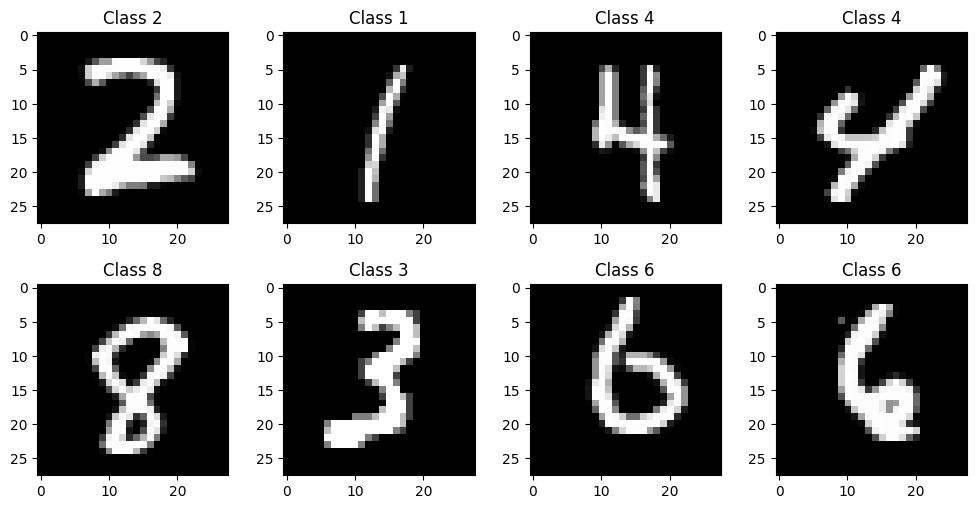

In [7]:
# show image of training data

plt.figure(figsize = (10, 10)) # set size of figure 10x10
rand_indexes = np.random.randint(0, X_train.shape[0], 8) # select 8 digits(0~9) randomly 
print(rand_indexes)

for index,im_index in enumerate(rand_indexes):
    plt.subplot(4, 4, index+1)
    plt.imshow(X_train[im_index], cmap = 'gray', interpolation = 'none')
    plt.title('Class %d' % y_train[im_index])
plt.tight_layout()

In [10]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", X_test.shape)

Shape of X_train:  (60000, 28, 28)
Shape of y_train:  (10000, 28, 28)


5


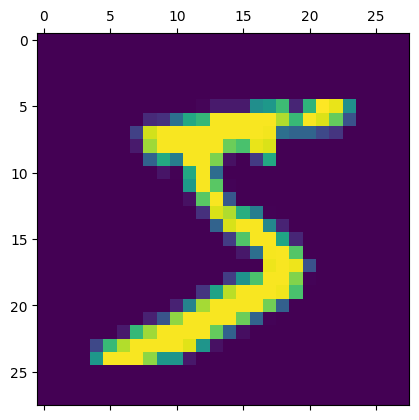

In [11]:
plt.matshow(X_train[0])
print(y_train[0])

# **Normalization and Reshaping:**

In [13]:
X_train = X_train / 255
X_test = X_test / 255

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

print(X_train_flattened.shape)

(60000, 784)


# **Network architecture:**

In [20]:
#define the model
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# **compilation step:**

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# **Preparing the labels:**

In [22]:
from keras.utils import to_categorical
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

# **Fit the Training Data:**

In [23]:
model.fit(X_train_flattened, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6182 - loss: 1.6531
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8670 - loss: 0.5195
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8926 - loss: 0.3917
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9023 - loss: 0.3462
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9099 - loss: 0.3173
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9142 - loss: 0.3029
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9140 - loss: 0.2972
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9190 - loss: 0.2789
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9220 - loss: 0.2704
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9249 - loss: 0.2593


# **Evaluate the Model:**

In [24]:
test_loss, test_acc = model.evaluate(X_test_flattened,y_test)
print("Test Accuracy: ", test_acc)
print("Test loss:", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9149 - loss: 0.2866
Test Accuracy:  0.9265000224113464
Test loss: 0.25317832827568054


# **Confusion Matrix:**

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


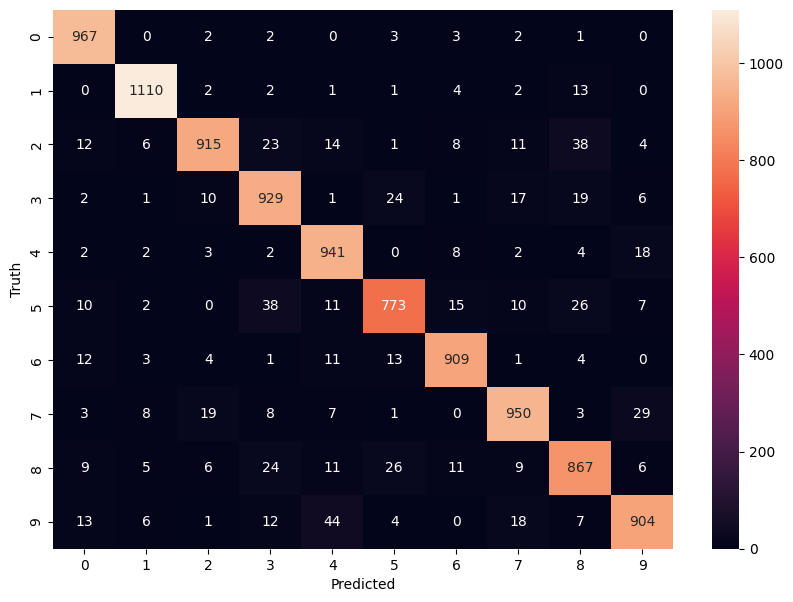

In [30]:

y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()